<h1 style = "font-size:3rem;color:darkcyan"> Training a Neural Network using Back Propagation & Gradient Descent </h1>

implementing backward propagation from scratch


In [8]:
# import libraries
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt

In [304]:
class MLP:
    
    def __init__(self,n_inputs = 3, hidden_layer_sizes = [3,4], n_targets = 1):
        self.n_inputs = n_inputs
        self.hidden_layer_sizes = hidden_layer_sizes
        self.n_targets = n_targets
        
        layers = [self.n_inputs] + self.hidden_layer_sizes + [self.n_targets]
        print(layers)
        
        self.weights = [np.random.rand(layers[i], layers[i+1]) for i in range(len(layers)-1)]
        self.biases = [np.random.rand(layers[i]) for i in range(1, len(layers))]
        self.activations = [np.zeros(layers[i]) for i in range(len(layers))]
        self.derivatives = [np.zeros((layers[i], layers[i+1])) for i in range(len(layers)-1)]
        self.deltas = [np.zeros(layers[i]) for i in range(1, len(layers))]
    
        
    def _sigmoid(self, net_inputs):
        a = 1 / (1 + np.exp(-net_inputs))
        return a
    
    def _sigmoid_dh(self, x):
        da = x * (1.0 - x)
        return da
    
    def _activate(self, inputs, W, b):
        net_inputs = np.dot(inputs, W) + b # summation
        activation = self._sigmoid(net_inputs) # modulation
        return activation
    
    def _forward_propagate(self, inputs):
        activations = inputs
        self.activations[0] = activations
        for i in range(len(self.weights)):
            activations = self._activate(activations, self.weights[i], self.biases[i])
            self.activations[i+1] = activations
        return activations
    
    def _back_propagate(self, error, verbose=False):
        # calculate error gradient
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_dh(activations)
            self.deltas[i] = delta
            delta_reshaped =  delta.reshape(delta.shape[0], -1).T
            current_activations = self.activations[i]
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0], -1)
            self.derivatives[i] = np.dot(current_activations_reshaped, delta_reshaped)
            error = np.dot(delta, self.weights[i].T)
            
            if verbose:
                print(f'Derivatives for W[{i}] = {self.derivatives[i]}')
                
        return error
         
    def _gradient_descent(self, learning_rate):
        for i in range(len(self.weights)):
            # print(f'Original weights = {self.weights[i]}')
            self.weights[i] += self.derivatives[i] * learning_rate
            self.biases[i] += self.deltas[i] * learning_rate
            # print(f'Updated weights = {self.weights[i]}')
    
    def _mse(self, target, output):
        return np.average((target - output)**2)
    
    def train_neural_network(self, inputs, targets, learning_rate, max_epochs):
        if np.array(inputs).shape[1] != self.n_inputs:
            print("Number of inputs does not match the input layer!")
            return None
        
        if np.array(targets).shape[1] != self.n_targets:
            print("Number of targets does not match the output layer!")
            return None
        
        # repeat for max_epochs or when target error rate is achieved
        for i in range(max_epochs):
            sum_error = 0
            for x,target in zip(inputs, targets):
                # propagate forward
                output = self._forward_propagate(x)

                # calculate new error
                error = target - output

                # propagate backward
                self._back_propagate(error)

                # gradient descent
                self._gradient_descent(learning_rate)

                # calc sum error & print
                sum_error += self._mse(target, output)
            
            # print error after each epoch
            print(f'Error = {sum_error / len(inputs)} at epoch {i}')
        
        print(f'number of epochs exceeded ({i})')
        return self._forward_propagate(inputs)

In [357]:
mlp = MLP(2, [5], 1)

[2, 5, 1]


In [367]:
learning_rate = 0.1
epochs = 50

# train model to add inputs
inputs = np.array([[random() / 2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in inputs])

In [368]:
print(f'{inputs[0, 0]} + {inputs[0 , 1]}  = {targets[0]}')

0.32619446392163065 + 0.23212592851060904  = [0.55832039]


In [369]:
out = mlp.train_neural_network(inputs, targets, learning_rate, epochs)

Error = 0.05171888505665107 at epoch 0
Error = 0.03894116219040344 at epoch 1
Error = 0.03772762316695088 at epoch 2
Error = 0.03631905090784068 at epoch 3
Error = 0.03465396246399056 at epoch 4
Error = 0.032676551102675394 at epoch 5
Error = 0.030346443873395 at epoch 6
Error = 0.027654156510842406 at epoch 7
Error = 0.024638746603844252 at epoch 8
Error = 0.02139905664664055 at epoch 9
Error = 0.018087670971122283 at epoch 10
Error = 0.014882900052711735 at epoch 11
Error = 0.011947765965489507 at epoch 12
Error = 0.009394956737604676 at epoch 13
Error = 0.00727275166303661 at epoch 14
Error = 0.005572864051039887 at epoch 15
Error = 0.004250141581570312 at epoch 16
Error = 0.0032428946020088456 at epoch 17
Error = 0.002487671090939929 at epoch 18
Error = 0.001927454382328384 at epoch 19
Error = 0.001514862394469606 at epoch 20
Error = 0.0012123914220444594 at epoch 21
Error = 0.0009912709573105605 at epoch 22
Error = 0.0008298733328577619 at epoch 23
Error = 0.0007121522243968805 at

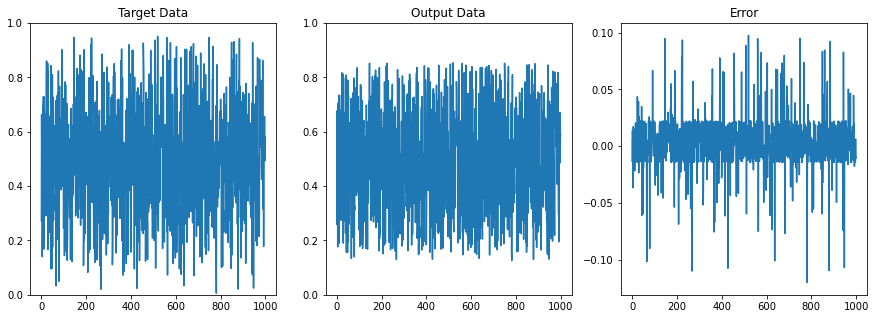

In [330]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Target Data')
plt.ylim([0,1])
plt.plot(targets)
plt.subplot(1,3,2)
plt.ylim([0,1])
plt.title('Output Data')
plt.plot(out)
plt.subplot(1,3,3)
plt.title('Error')
plt.plot(targets - out)

In [331]:
total_error = np.average(targets - out)**2
print(total_error)

1.3873571704807504e-05


In [356]:
# predict data
inputs = [0.4, 0.1]
output = inputs[0] + inputs[1]
y_pred = mlp._forward_propagate(inputs)
print(f'Actual value: {output}, predicted value: {y_pred}')
print(f'Error = {output - y_pred}')

Actual value: 0.5, predicted value: [0.5004501]
Error = [-0.0004501]
